# Exploratory Data Analysis: Apple, Inc & SEC Filings


## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---
# Importing the Data

## Creating a Function to Read the Data:

In [2]:
company_name = 'Apple'

In [3]:
def reader(company_name):
    company_name = company_name
    
    stock = pd.read_csv(f'data/{company_name}_clean.csv')
    stock['Date'] = pd.to_datetime(stock.Date)
    stock.set_index('Date', inplace=True)
    
    sec_filings = pd.read_csv(f'../sec/data/{company_name}_SEC_clean.csv')

    sec_filings.rename({'date':'Date'}, axis=1, inplace=True)
    sec_filings['Date'] = pd.to_datetime(sec_filings.Date)
    sec_filings.set_index('Date', inplace=True)

    data = pd.merge(stock, sec_filings, on='Date')
    data.reset_index(level=0, inplace=True)
    return data

## Importing the Data:

In [4]:
df = reader('Apple')

In [5]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,...,S-4/A,S-8,SC 13D,SC 13D/A,SC 13G,SC 13G/A,SC TO-I,SC TO-I/A,SD,UPLOAD
0,1994-01-26,33.75,34.0,33.25,33.5,1480400.0,0.0,1.0,1.057482,1.065315,...,0,0,0,0,0,0,0,0,0,0
1,1994-01-26,33.75,34.0,33.25,33.5,1480400.0,0.0,1.0,1.057482,1.065315,...,0,0,0,0,0,0,0,0,0,0


-------

# Visualizing the Data with SEC Filings

## Creating a Functions to Plot the Data:

In [6]:
def plotter(dataframe, column_1,
              document_type = None,
              start_date = None,
              end_date = None,
              company_name=company_name):
   
    temp_df = dataframe.copy()
    
    if start_date:
        temp_df = temp_df[temp_df['Date']>=start_date]
    if end_date:
        temp_df = temp_df[temp_df['Date']<=end_date]
    
    temp_df.set_index('Date', inplace=True, drop=False)
    
    plt.figure(figsize=(16,8))
    sns.set_style("darkgrid")
    
    temp_df[column_1].plot(lw=2.5)
    
    if document_type:
        
        if document_type == '8-K':
            doc_8K = temp_df[temp_df['8-K']==1].index
            list_8K = []
    
            for document in doc_8K:
                list_8K.append(document)
    
            for file in list_8K:
                plt.axvline(file, ls='-', color = 'm')
                plt.legend()

        if document_type == '10-K':
    
            doc_10K = temp_df[temp_df['10-K']==1].index
            list_10K = [] 
        
            for document in doc_10K:
                list_10K.append(document)
    
            for file in list_10K:
                plt.axvline(file, ls='-', color = 'lightseagreen')
                plt.legend()
                
        if document_type == '10-Q':        
            doc_10Q = temp_df[temp_df['10-Q']==1].index
           
            list_10Q = []
            for document in doc_10Q:
                list_10Q.append(document)
        
            for file in list_10Q:
                plt.axvline(file, ls='-', color = 'teal')
                plt.legend()
    

    plt.title(f'{company_name}:  {column_1} \n SEC File:  {document_type}\n'
                  f'{str(temp_df.Date.min())[:10]} - {str(temp_df.Date.max())[:10]}', fontsize=18)
        
    plt.ylabel('Price ($)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend()
    plt.tight_layout()

## Visualizing 8-K Filings with the Closing Price:

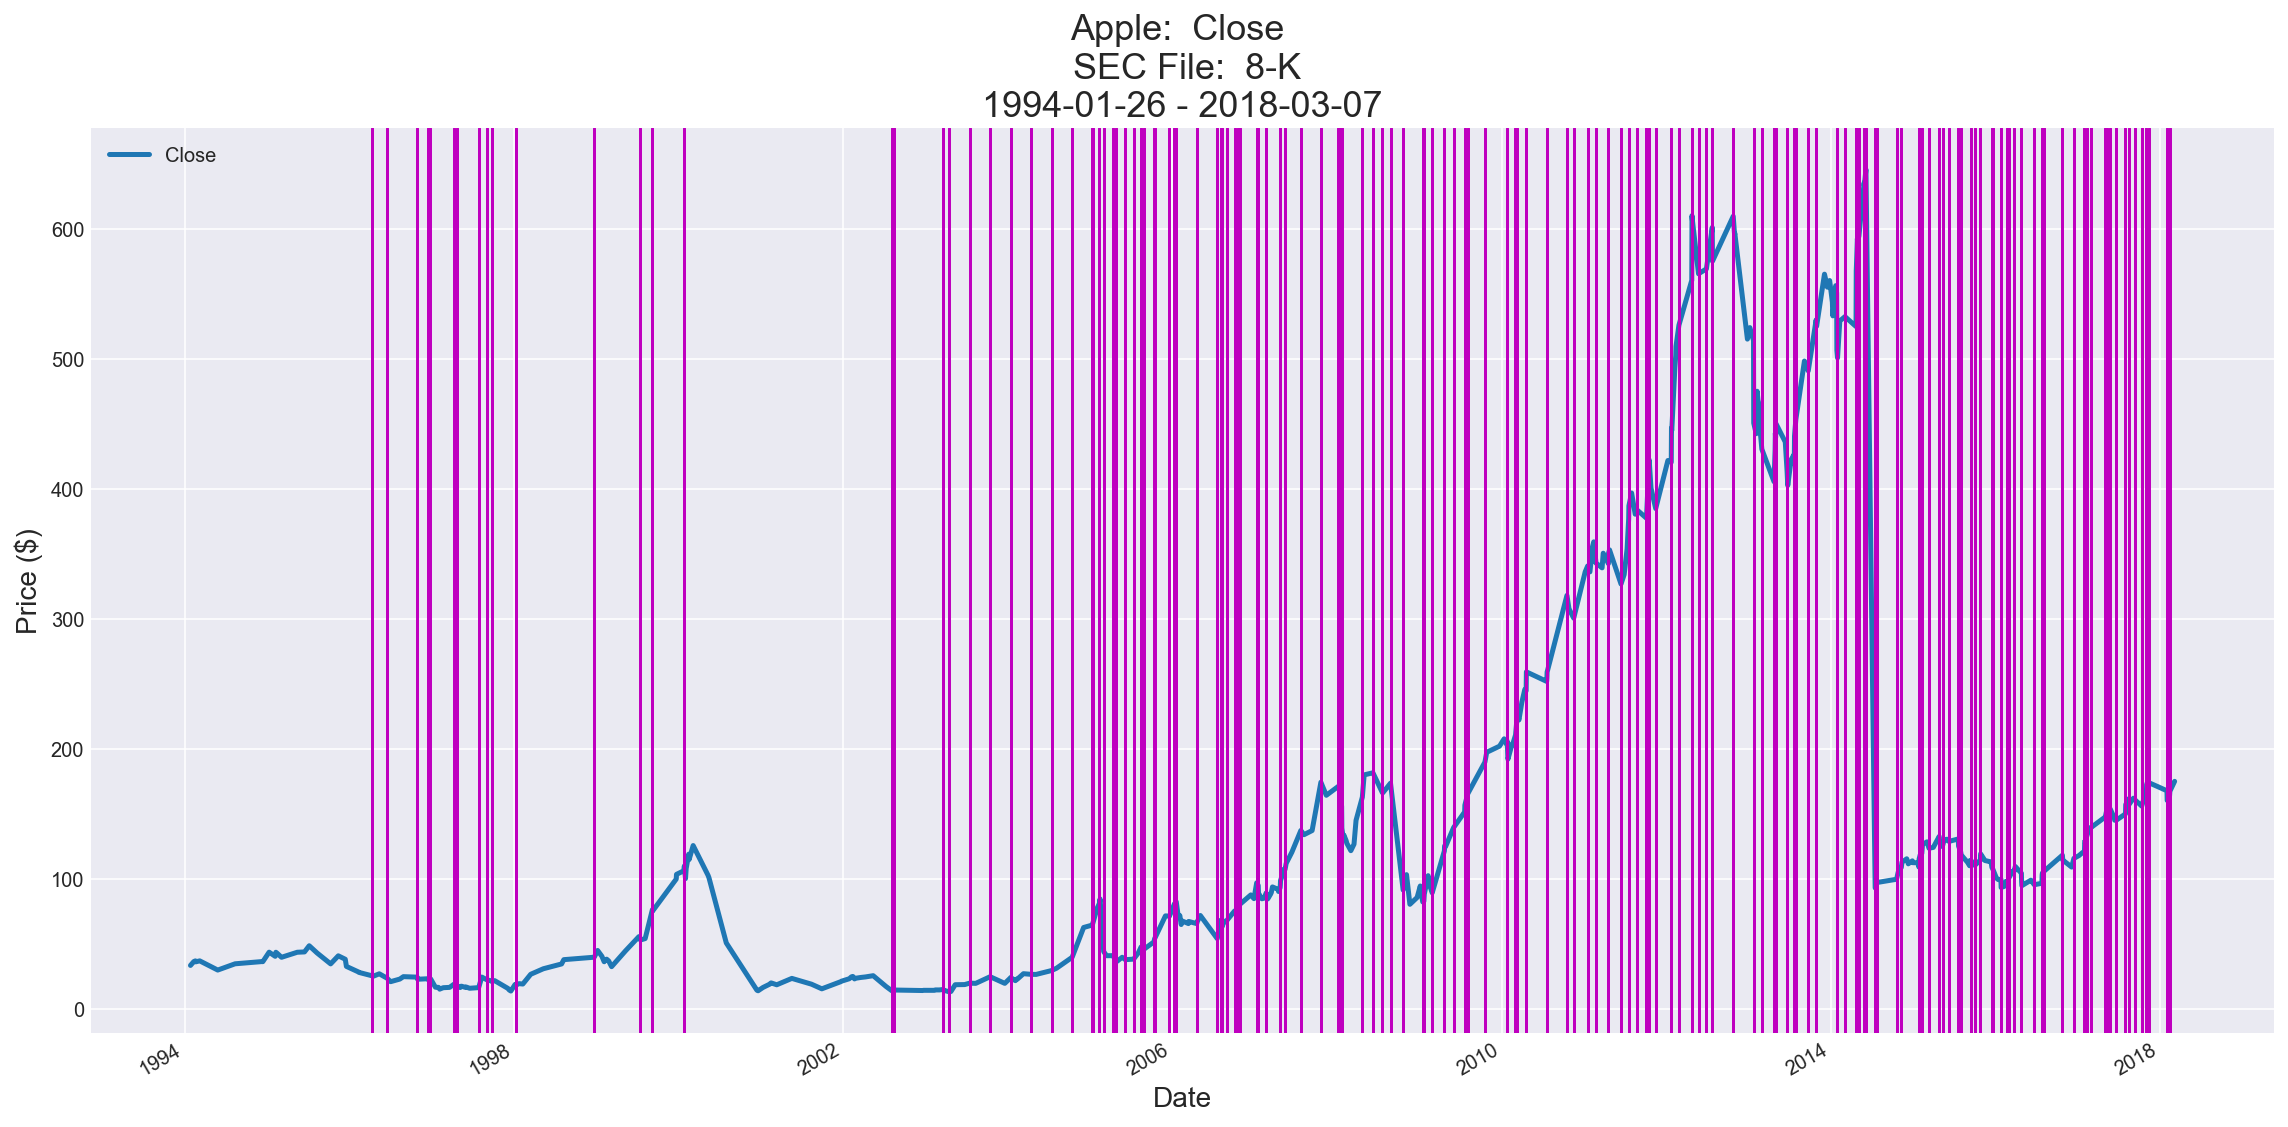

In [10]:
plotter(df, 'Close', '8-K')

## Taking a Closer look at the last 3 Years:

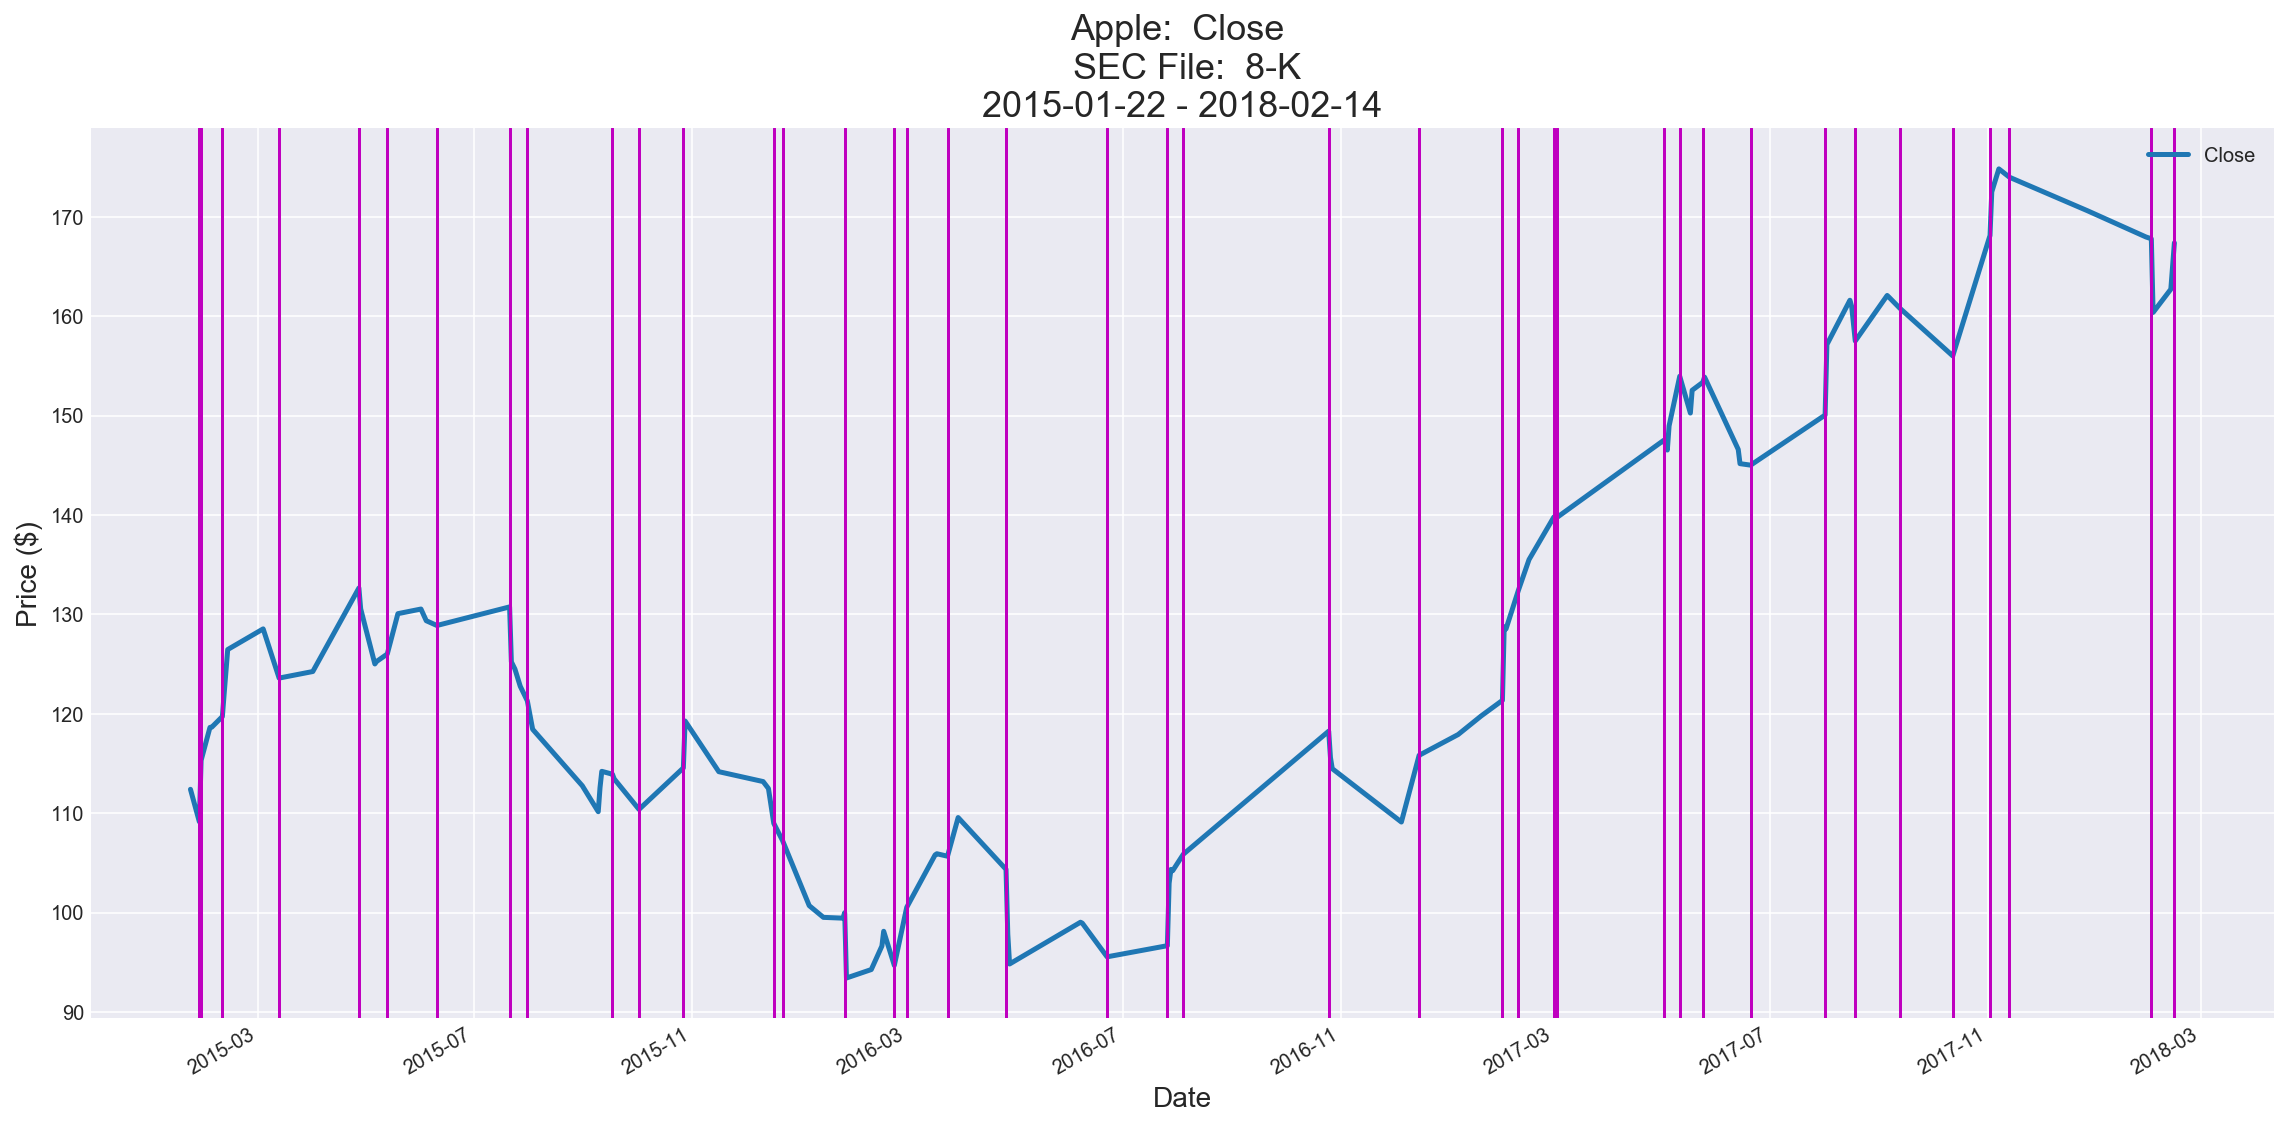

In [7]:
plotter(df, 'Close', '8-K', start_date='2015-01-01',end_date='2018-03-01')

------

## Visualizing 10-K Filings with the Closing Price:

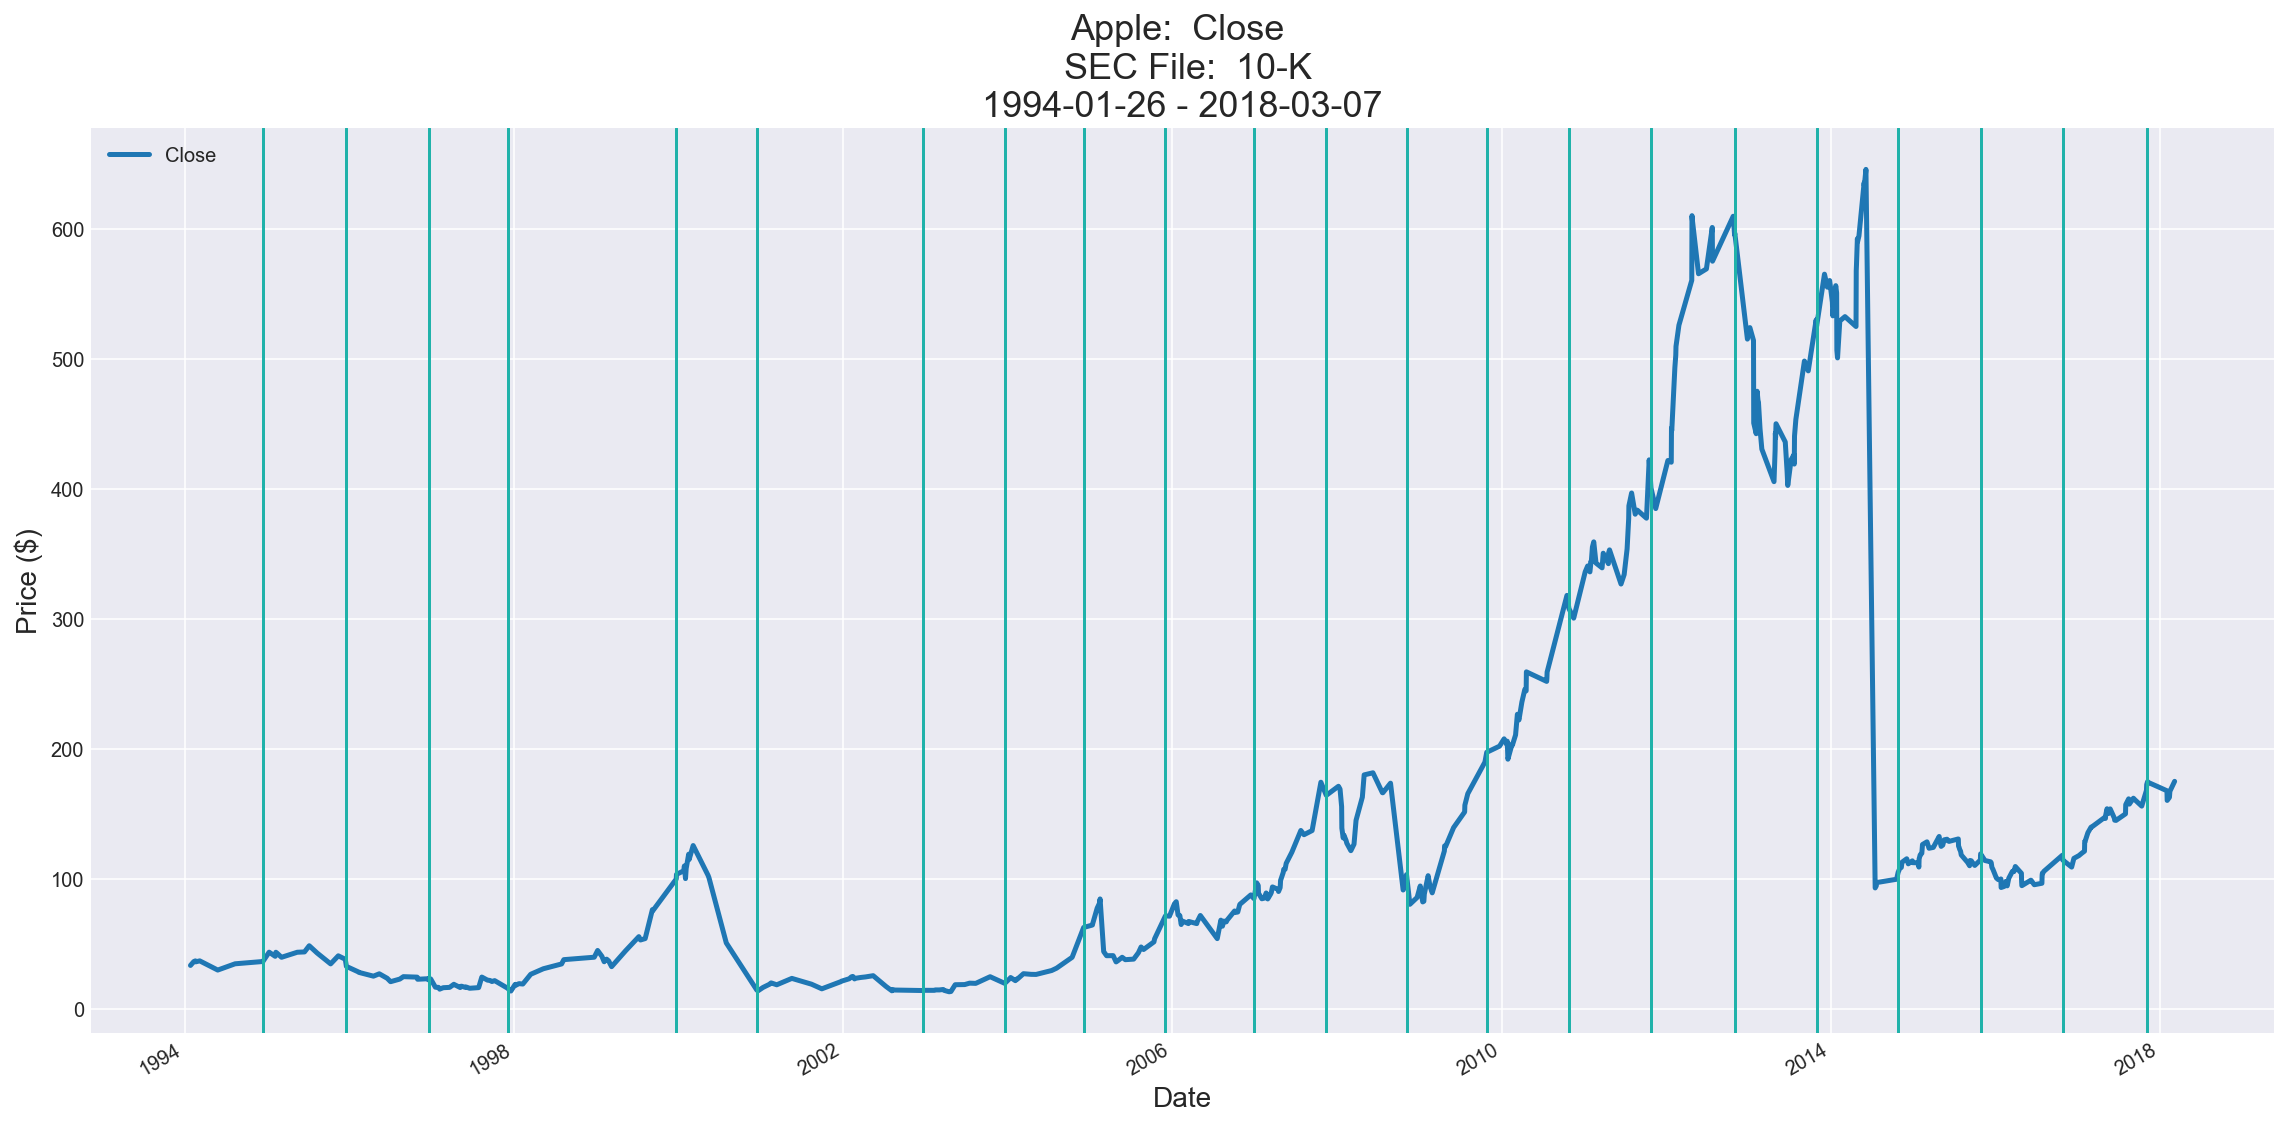

In [11]:
plotter(df, 'Close', '10-K')

## Taking a Closer look at the last 3 Years:

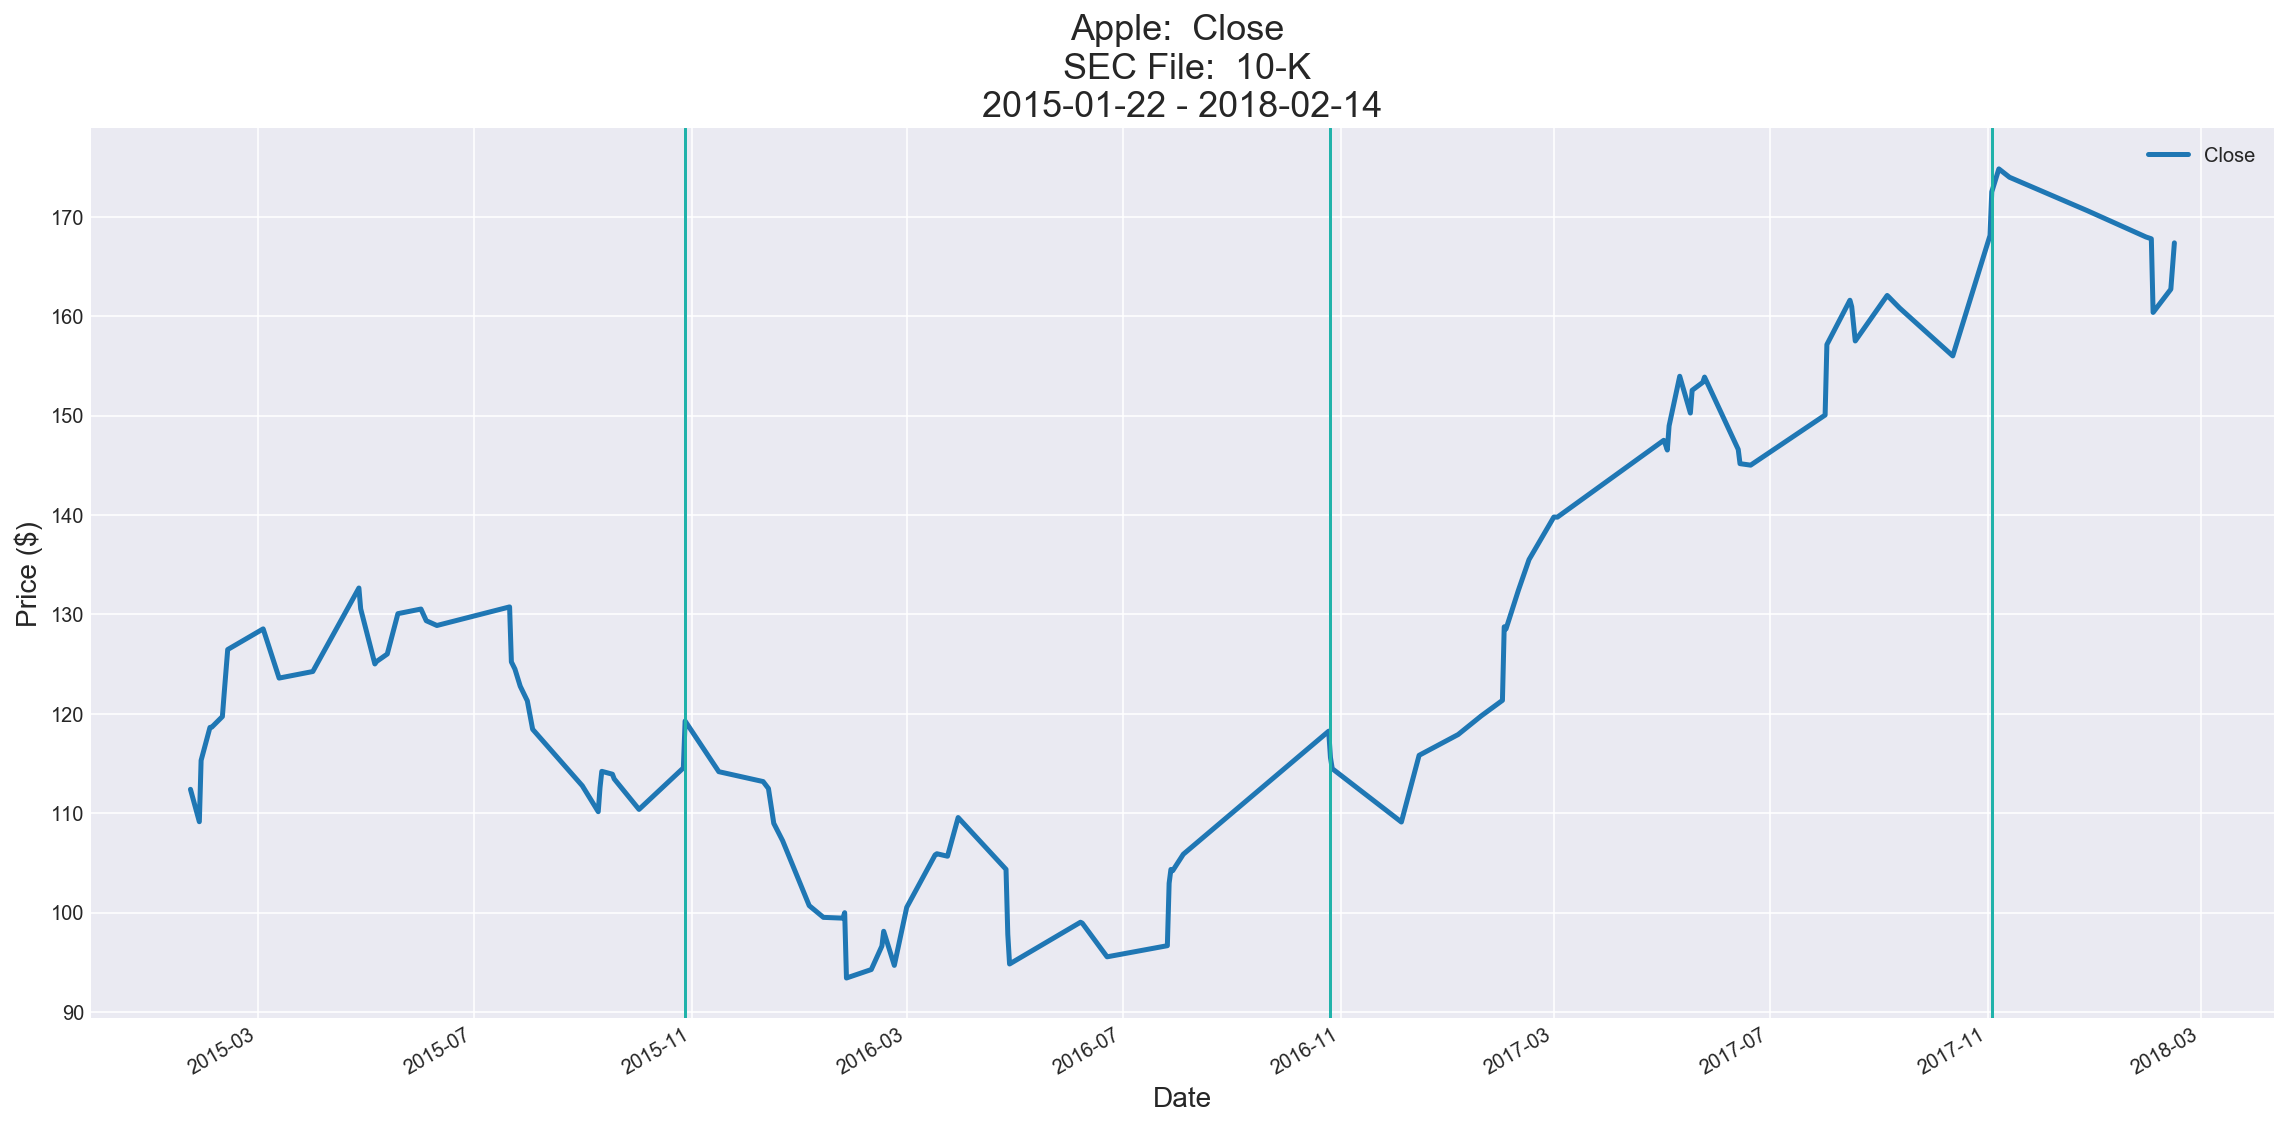

In [8]:
plotter(df, 'Close', '10-K', start_date='2015-01-01',end_date='2018-03-01')

------

## Visualizing 10-Q Filings with the Closing Price:

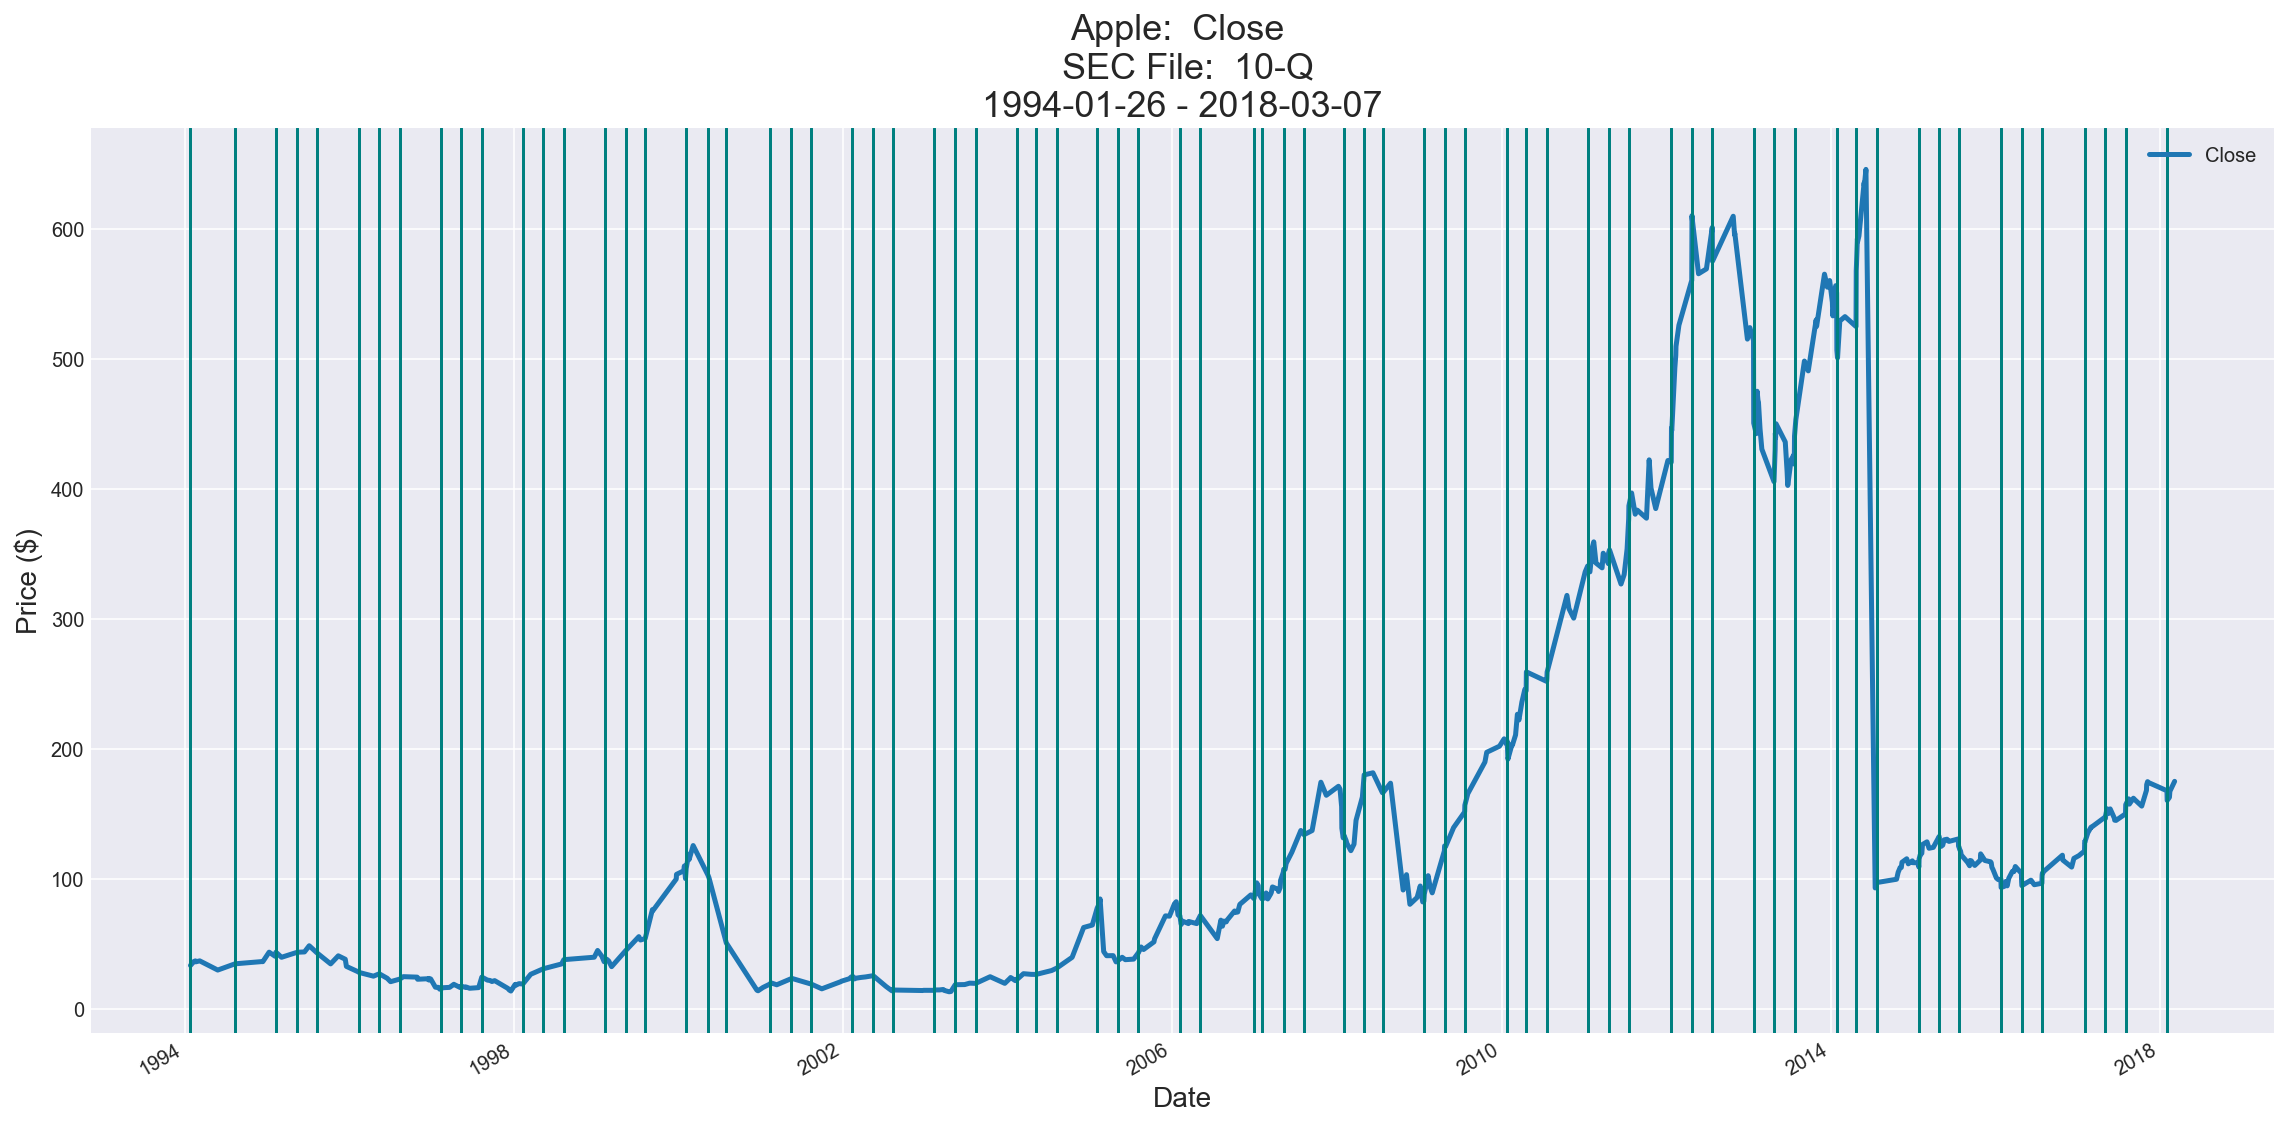

In [12]:
plotter(df, 'Close', '10-Q')

## Taking a Closer look at the last 3 Years:

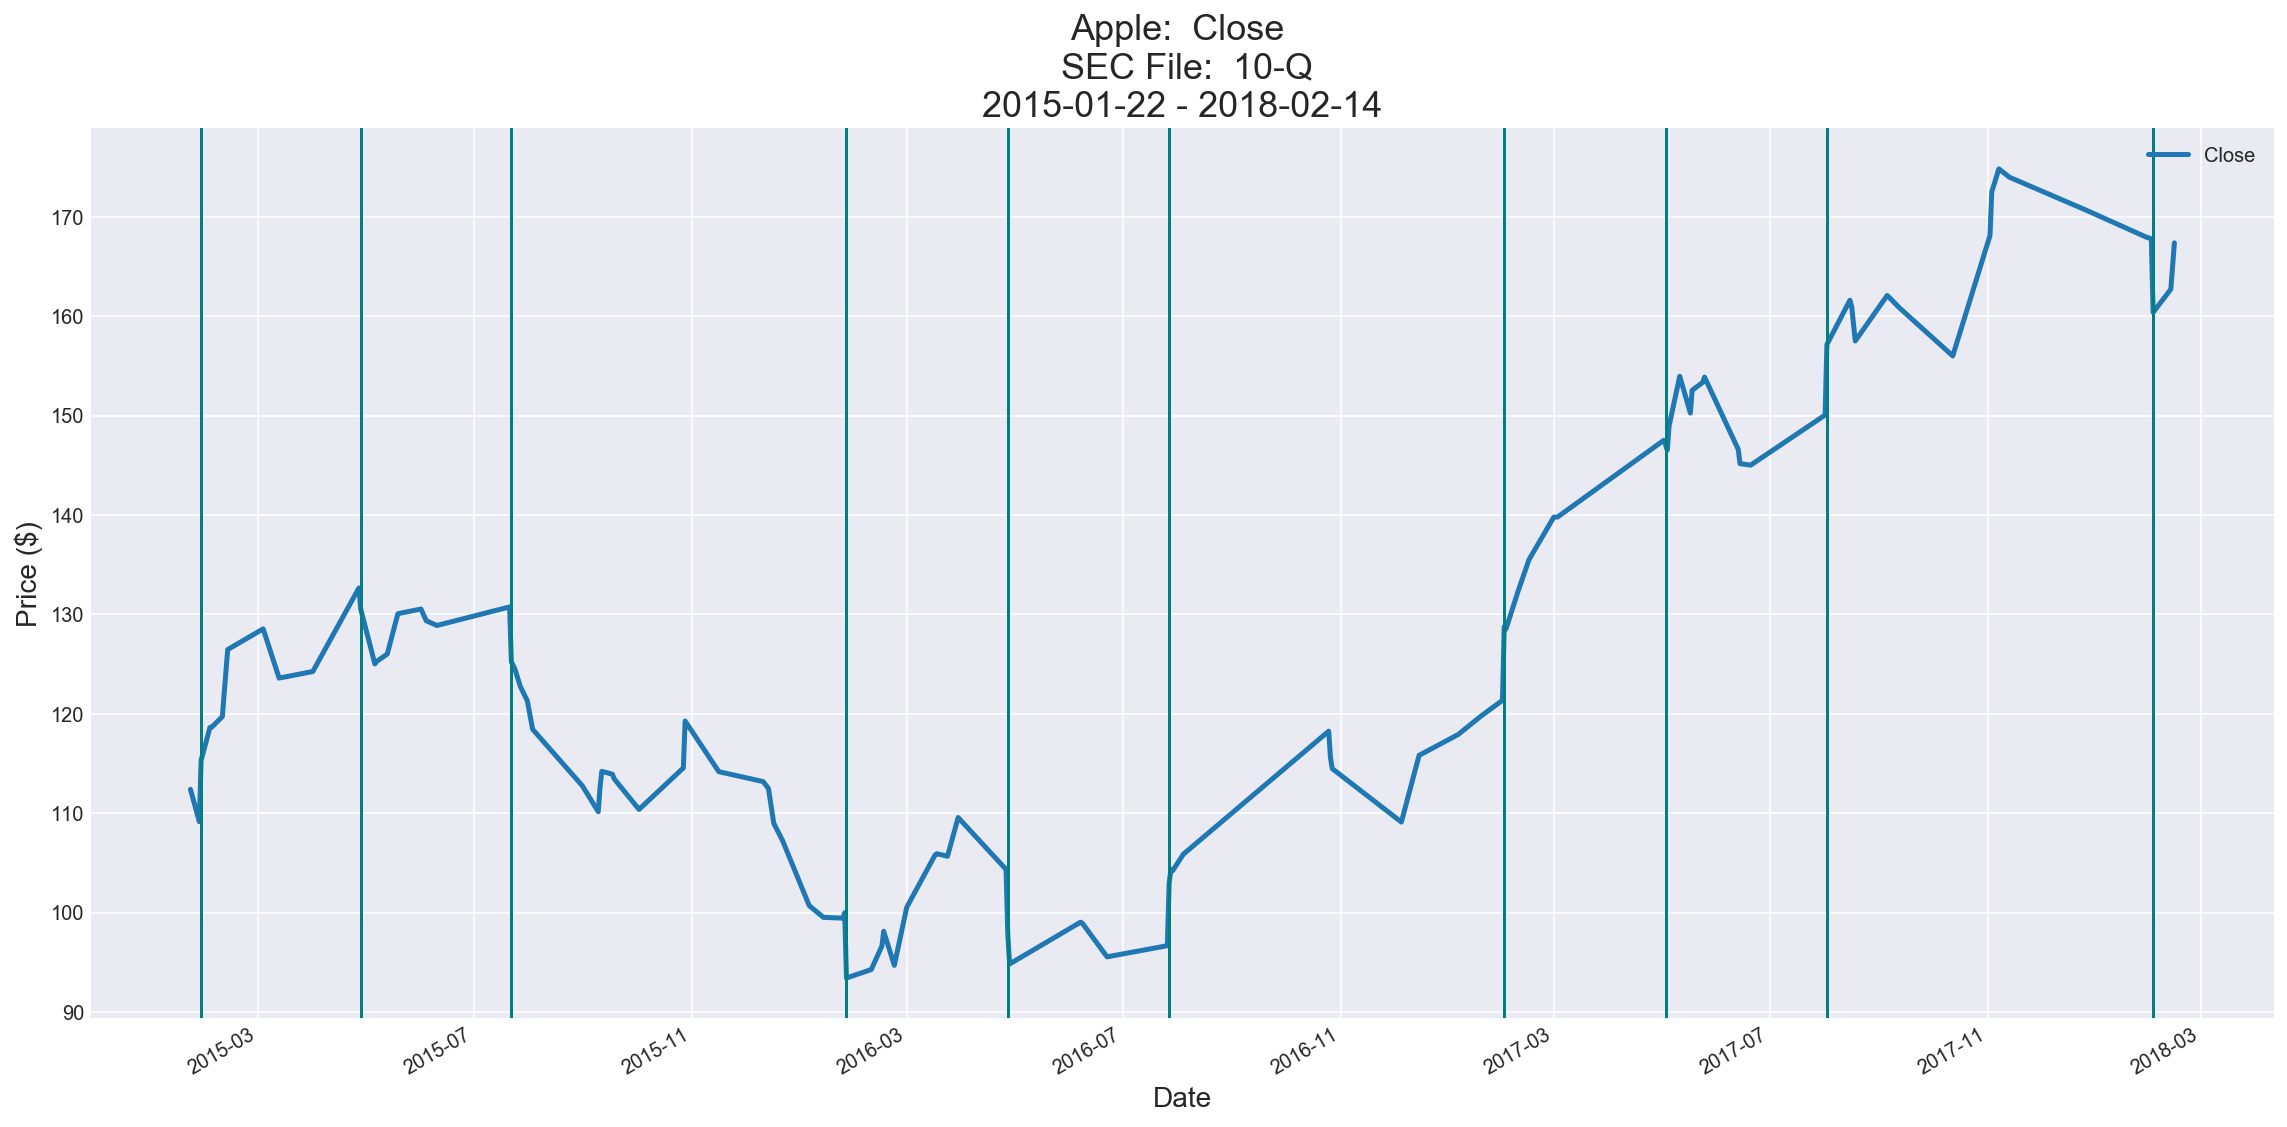

In [9]:
plotter(df, 'Close', '10-Q', start_date='2015-01-01',end_date='2018-03-01')

## Questions:

- Legends on SEC Files
- Plotting with a Negative Y axis
- NA's

----

## Saving on to a CSV:

In [ ]:
# df.to_csv(f'data/{company_name}_wSEC.csv', index=False)